<a href="https://colab.research.google.com/github/SergioPGJunior/Wordcloud/blob/master/palavras_pagode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

vagalume = 'https://www.vagalume.com.br'
url_pagode = "https://www.vagalume.com.br/browse/style/pagode.html"

request = requests.get(url_pagode)

page = request.text

soup = BeautifulSoup(page)

# Busca os nomes dos artistas da categoria pagode
artistas = pd.Series(name='artistas')

for div in soup.find_all('div', attrs= {'class':'moreNamesContainer h16'}):
  ind = 0
  for link in div.find_all('a'):
    artistas.at[ind] = link.get('href')
    ind += 1

artistas.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


0           /100-kao/
1               /3zi/
2         /a-bronkka/
3    /a-voz-da-razao/
4         /ah-muleke/
Name: artistas, dtype: object

In [3]:
musicas = pd.Series(name='musicas')
ind = 0
for artista in artistas:
  url_artista = vagalume + artista + 'discografia'
  request_artista = requests.get(url_artista)

  page_artista = request_artista.text

  soup_artista = BeautifulSoup(page_artista)

  for div in soup_artista.find_all('div', attrs= {'class':'topLetrasWrapper'}):
    for link in div.find_all('a', attrs={'class':'nameMusic'}):
      musicas.at[ind] = link.get('href')
      ind += 1

musicas.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0    /albertinho/musa-da-favela.html
1     /albertinho/acabou-o-amor.html
2         /albertinho/pra-valer.html
3     /alexandre-pires/eu-menti.html
4     /alexandre-pires/eu-e-ela.html
Name: musicas, dtype: object

In [4]:
letras = pd.Series(name='letras')

ind = 0
for musica in musicas:
    url_musica = vagalume + musica
    request_musica = requests.get(url_musica)
    request_musica.encoding = 'utf-8' #Corrigir a codificação para o python exibir os acentos corretamente

    page_musica = request_musica.text

    soup_musica = BeautifulSoup(page_musica)

    letra = soup_musica.find(id='lyrics')

    letras.at[ind] = letra
    ind += 1

letras.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0     [Ela chega, [], Ela top, [], Incomoda, [], Faz...
1     [Cartas pelo chão, [], Flores onde estão, [], ...
2     [Toda vez que eu te vejo, [], O meu coração di...
3     [Eu menti, [], Quando disse que não te queria,...
4     [Um grande amor começa agora, [], Tudo é um so...
5     [Tô querendo te encontrar, [], Sinto a falta d...
6     [Não dá pra esconder, [], O que eu sinto por v...
7     [Estava tão tristonho quando ela apareceu, [],...
8     [Quando você vem pra passar o fim de semana, [...
9     [É na escola da vida que a gente aprende a ama...
10    [Nada mal, curtir o terra samba, não é nada ma...
11    [Eu não tenho culpa de estar te amando, [], De...
12    [A noite madrugou, se fez manhã, [], E eu acor...
13    [Ah! Eu adoro amar você, [], Como eu te quero,...
14    [E a galera lá do Morro, [], Do Salgueiro e Vi...
15    [Como é que uma coisa assim machuca tanto, [],...
16    [Neném, [], Olha que te quero comigo, [], Mas ...
17    [Tô te vendo, [], Tô sentindo, [], Tô chor

In [5]:
letras = letras.dropna()

In [6]:
l = pd.Series()
for index, value in letras.items():
  l.at[index] = value.getText(separator=' ')

l.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0    Ela chega Ela top Incomoda Faz acontecer Essa ...
1    Cartas pelo chão Flores onde estão O vaso que ...
2    Toda vez que eu te vejo O meu coração dispara ...
3    Eu menti Quando disse que não te queria Quando...
4    Um grande amor começa agora Tudo é um sonho li...
5    Tô querendo te encontrar Sinto a falta do teu ...
6    Não dá pra esconder O que eu sinto por você Ar...
7    Estava tão tristonho quando ela apareceu Seus ...
8    Quando você vem pra passar o fim de semana Eu ...
9    É na escola da vida que a gente aprende a amar...
dtype: object

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

#Divide strings em lista de palavras baseadas em um padrão específico utilizando Regexp
tokenizer = RegexpTokenizer(r'\w+')

l = l.apply(lambda x: tokenizer.tokenize(x.lower()))

l.head(20)

0     [ela, chega, ela, top, incomoda, faz, acontece...
1     [cartas, pelo, chão, flores, onde, estão, o, v...
2     [toda, vez, que, eu, te, vejo, o, meu, coração...
3     [eu, menti, quando, disse, que, não, te, queri...
4     [um, grande, amor, começa, agora, tudo, é, um,...
5     [tô, querendo, te, encontrar, sinto, a, falta,...
6     [não, dá, pra, esconder, o, que, eu, sinto, po...
7     [estava, tão, tristonho, quando, ela, apareceu...
8     [quando, você, vem, pra, passar, o, fim, de, s...
9     [é, na, escola, da, vida, que, a, gente, apren...
10    [nada, mal, curtir, o, terra, samba, não, é, n...
11    [eu, não, tenho, culpa, de, estar, te, amando,...
12    [a, noite, madrugou, se, fez, manhã, e, eu, ac...
13    [ah, eu, adoro, amar, você, como, eu, te, quer...
14    [e, a, galera, lá, do, morro, do, salgueiro, e...
15    [como, é, que, uma, coisa, assim, machuca, tan...
16    [neném, olha, que, te, quero, comigo, mas, sei...
17    [tô, te, vendo, tô, sentindo, tô, chorando

In [8]:
nltk.download('stopwords') #Foi necessário fazer o download. O colab estava indicando erro

def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('portuguese')]
  return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#Remove palavras que são usadas com muita frequência Ex.: Eu, meu, ele, a, um ... 
l = l.apply(lambda x: remove_stopwords(x))
l.head(10)

0    [chega, top, incomoda, faz, acontecer, mina, z...
1    [cartas, chão, flores, onde, vaso, caiu, corto...
2    [toda, vez, vejo, coração, dispara, tao, forte...
3    [menti, disse, queria, disse, alegria, viver, ...
4    [grande, amor, começa, agora, tudo, sonho, lin...
5    [tô, querendo, encontrar, sinto, falta, amor, ...
6    [dá, pra, esconder, sinto, ara, dá, dá, dá, dá...
7    [tão, tristonho, apareceu, olhos, fascinam, lo...
8    [vem, pra, passar, fim, semana, finjo, estar, ...
9    [escola, vida, gente, aprende, amar, coração, ...
dtype: object

In [10]:
from nltk.probability import FreqDist

freq = FreqDist()

for letra in l:
  fdist = FreqDist(letra)
  freq += fdist 

freq.pprint()

FreqDist({'pra': 12976, 'amor': 9038, 'vai': 5518, 'vou': 5447, 'quero': 3869, 'coração': 3489, 'tudo': 3201, 'mim': 3158, 'gente': 3157, 'vem': 3034, ...})


In [13]:
freq.pop('pra')
freq.pop('mim')
freq.pop('c7')
freq.pop('f7')
freq.pop('b7')
freq.pop('refrão')
freq.pop('2x')
freq.pop('e7')
freq.pop('g7')

879

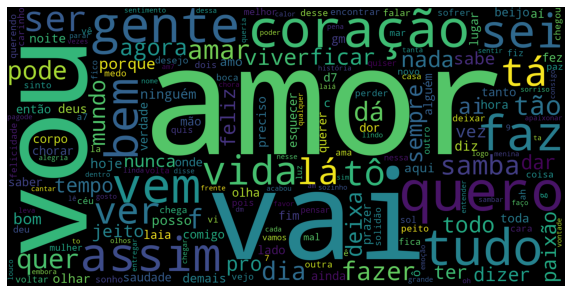

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_summary = []
# concatenar as palavras
for i in l:
  all_summary += i

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "pra","vai","vou","mim"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate_from_frequencies(freq)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("pagode.png")